## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here (5 points)**   

##################################     
TODO: Derive you answer hear
#################################

$\frac{\partial L}{\partial W_k} = x_i$

$\frac{\partial L}{\partial b} = x_i$

$W_k^{new} = W_k^{old} - \eta \cdot \frac{\partial L}{\partial W_k}$

$b^{new} = b^{old} - \eta \cdot \frac{\partial L}{\partial b}$

$\eta  = learning rate$          

In [4]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

/home/myu/.conda/envs/carla/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [6]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [7]:
import numpy as np
import matplotlib.pyplot as plt

class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  small std and zero mean gaussian   ##
        #########################################
        weight = np.random.normal(0, 0.01, size=(weight_dimension+1, num_cls))
        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data - self.sample_mean) / self.sample_std
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        
        train_acc = 0.0
        for i in range(X_train.shape[0]):
            x = np.concatenate((X_train[i], [1]))  # Add 1 for bias term
            y = np.argmax(np.dot(x, self.weight), axis=0)
            
            if y != y_train[i]:
                self.weight[:, y_train[i]] += self.lr * x
                self.weight[:, y] -= self.lr * x
                
            train_acc += 1 if y == y_train[i] else 0
        
        train_acc /= X_train.shape[0]
        return train_acc
        
    def test_step(self, X_test, y_test):
        X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = 0.0
        
        for i in range(num_sample):
            x = np.concatenate((X_test[i], [1]))
            y = np.argmax(np.dot(x, self.weight), axis=0)
            test_acc += 1 if y == y_test[i] else 0
        
        test_acc /= num_sample
        return test_acc
        
    def train(self):
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]
        shuffle_index = np.array(range(0, num_sample))
        
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()  


epoch: 0 traing_acc:0.762 tst_acc:0.911
epoch: 1 traing_acc:0.924 tst_acc:0.911
epoch: 2 traing_acc:0.914 tst_acc:0.956
epoch: 3 traing_acc:0.933 tst_acc:0.978
epoch: 4 traing_acc:0.886 tst_acc:0.978
epoch: 5 traing_acc:0.962 tst_acc:0.978
epoch: 6 traing_acc:0.943 tst_acc:0.956
epoch: 7 traing_acc:0.971 tst_acc:0.933
epoch: 8 traing_acc:0.933 tst_acc:0.978
epoch: 9 traing_acc:0.933 tst_acc:0.978
epoch: 10 traing_acc:0.971 tst_acc:1.000
epoch: 11 traing_acc:0.952 tst_acc:0.978
epoch: 12 traing_acc:0.952 tst_acc:0.956
epoch: 13 traing_acc:0.952 tst_acc:0.978
epoch: 14 traing_acc:0.962 tst_acc:0.933
epoch: 15 traing_acc:0.943 tst_acc:0.933
epoch: 16 traing_acc:0.952 tst_acc:0.978
epoch: 17 traing_acc:0.943 tst_acc:0.956
epoch: 18 traing_acc:0.952 tst_acc:0.978
epoch: 19 traing_acc:0.962 tst_acc:0.978
epoch: 20 traing_acc:0.962 tst_acc:0.978
epoch: 21 traing_acc:0.943 tst_acc:0.978
epoch: 22 traing_acc:0.933 tst_acc:0.933
epoch: 23 traing_acc:0.981 tst_acc:0.933
epoch: 24 traing_acc:0.952

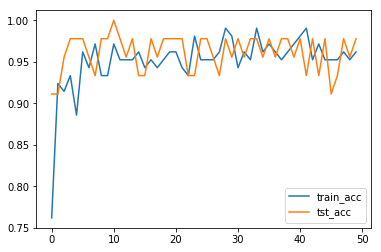

In [8]:
np.random.seed(0)

#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches
lr = 0.01  # 学习率
num_epoch = 50  # 训练周期数
weight_dimension = X_train.shape[1]  # 权重维度
num_cls = len(set(y_train))  
model = MultiClsPLA(X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls)

# 训练模型
model.train()

# 可视化结果
model.vis_acc_curve()

